In [69]:
import pandas as pd
import numpy as np
import geopy.distance
import fiona
from tqdm import tqdm

### Shape file to CSV

In [70]:
df_SC = fiona.open('MINEDEX - Cu-Pb-Zn (TARGET) Zn (Site Commodity).shp')
df_SC.next()['properties']

/Users/zhengyuchen/opt/anaconda3/envs/cits5508-fix/lib/python3.7/site-packages/ipykernel_launcher.py:2: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  


OrderedDict([('SITE_CODE', 'S0001179'),
             ('SITE_TITLE', 'Bonnie Rock BM'),
             ('SHORT_NAME', 'Bonnie Rock BM'),
             ('SITE_COMMO', 'Pb, Ag, Zn, Mn'),
             ('SITE_TYPE_', 'Deposit'),
             ('SITE_SUB_T', 'Unspecified'),
             ('SITE_STAGE', 'Undeveloped'),
             ('TARGET_COM', 'COPPER - LEAD - ZINC'),
             ('COMMODITY', 'BASE METAL'),
             ('PROJ_CODE', 'J00453'),
             ('PROJ_TITLE', 'Gossan Dam - Bonnie Rock'),
             ('CONFIDENTI', 'Public'),
             ('POINT_CONF', 'Public'),
             ('LATITUDE', -30.694559),
             ('LONGITUDE', 118.315903),
             ('WEB_LINK',
              'https://minedex.dmirs.wa.gov.au/Web/common/jump.jsp?jumpType=SITE&id=S0001179'),
             ('EXTRACT_DA', '2021-07-28')])

In [71]:
df = fiona.open('MINEDEX - Cu-Pb-Zn (TARGET).shp')
df.next()['properties']

/Users/zhengyuchen/opt/anaconda3/envs/cits5508-fix/lib/python3.7/site-packages/ipykernel_launcher.py:2: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  


OrderedDict([('SITE_CODE', 'S0000854'),
             ('SITE_TITLE', 'Horseshoe Lights'),
             ('SHORT_NAME', 'Horseshoe Lights'),
             ('SITE_COMMO', 'Cu, Au, Ag'),
             ('SITE_TYPE_', 'Mine'),
             ('SITE_SUB_T', 'Openpit'),
             ('SITE_STAGE', 'Care and Maintenance'),
             ('TARGET_COM', 'COPPER - LEAD - ZINC'),
             ('COMMODITY', 'BASE METAL'),
             ('PROJ_CODE', 'J00164'),
             ('PROJ_TITLE', 'Horseshoe Lights'),
             ('CONFIDENTI', 'Public'),
             ('POINT_CONF', 'Public'),
             ('LATITUDE', -25.361719),
             ('LONGITUDE', 118.6213),
             ('WEB_LINK',
              'https://minedex.dmirs.wa.gov.au/Web/common/jump.jsp?jumpType=SITE&id=S0000854'),
             ('EXTRACT_DA', '2021-07-28')])

In [72]:
ordered_dicts = []

for item in df_SC.items():
    ordered_dicts.append(item[1])
df_SC = pd.DataFrame([ordered_dicts[i]['properties'] for i, _ in enumerate(ordered_dicts)])
df_SC.head()

,SITE_CODE,SITE_TITLE,SHORT_NAME,SITE_COMMO,SITE_TYPE_,SITE_SUB_T,SITE_STAGE,TARGET_COM,COMMODITY,PROJ_CODE,PROJ_TITLE,CONFIDENTI,POINT_CONF,LATITUDE,LONGITUDE,WEB_LINK,EXTRACT_DA
0,S0001179,Bonnie Rock BM,Bonnie Rock BM,"Pb, Ag, Zn, Mn",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00453,Gossan Dam - Bonnie Rock,Public,Public,-30.694559,118.315903,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
1,S0001250,Manindi - Freddie Well Resource Group,Manindi Res Gp,"Zn, Cu",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00522,Manindi,Public,Public,-28.751856,118.683032,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
2,S0001256,Gossan Hill Portal,Gossan Hill U/G,"Cu, Zn, Pb, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.765087,116.962407,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
3,S0001257,Scuddles Portal,Scuddles U/G,"Zn, Pb, Cu, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.744567,116.945103,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
4,S0001335,Hammerhead - Lennons Find,Hammerhead,"Zn, Pb, Ag",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00563,Lennons Find,Public,Public,-21.355850,120.239098,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28


In [73]:
ordered_dicts = []

for item in df.items():
    ordered_dicts.append(item[1])
df = pd.DataFrame([ordered_dicts[i]['properties'] for i, _ in enumerate(ordered_dicts)])
df.head()

,SITE_CODE,SITE_TITLE,SHORT_NAME,SITE_COMMO,SITE_TYPE_,SITE_SUB_T,SITE_STAGE,TARGET_COM,COMMODITY,PROJ_CODE,PROJ_TITLE,CONFIDENTI,POINT_CONF,LATITUDE,LONGITUDE,WEB_LINK,EXTRACT_DA
0,S0000854,Horseshoe Lights,Horseshoe Lights,"Cu, Au, Ag",Mine,Openpit,Care and Maintenance,COPPER - LEAD - ZINC,BASE METAL,J00164,Horseshoe Lights,Public,Public,-25.361719,118.621300,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
1,S0001179,Bonnie Rock BM,Bonnie Rock BM,"Pb, Ag, Zn, Mn",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00453,Gossan Dam - Bonnie Rock,Public,Public,-30.694559,118.315903,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
2,S0001213,Copper Gorge,Copper Gorge,Cu,Prospect,Drillhole,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00486,Otway,Public,Public,-21.608749,120.350098,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
3,S0001250,Manindi - Freddie Well Resource Group,Manindi Res Gp,"Zn, Cu",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00522,Manindi,Public,Public,-28.751856,118.683032,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
4,S0001256,Gossan Hill Portal,Gossan Hill U/G,"Cu, Zn, Pb, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.765087,116.962407,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28


In [74]:
df_Zn = df[df['SITE_COMMO'].str.contains('Zn')]
df_Zn.shape

(964, 17)

In [75]:
df_SC.shape

(964, 17)

In [76]:
# The SITE_COMMO column in MINEDEX-Cu-Pb-Zn(TARGET).csv contains Zn
# -> MINEDEX-Cu-Pb-Zn(TARGET)Zn(Site Commodity).csv
df_SC.to_csv('MINEDEX-Cu-Pb-Zn(TARGET)Zn(Site Commodity).csv')
df.to_csv('MINEDEX-Cu-Pb-Zn(TARGET)')

In [77]:
df_minedex = pd.read_csv('MINEDEX-Cu-Pb-Zn(TARGET)Zn(Site Commodity).csv')

### Filter CSV

In [78]:
df_minedex = df_minedex.loc[(df_minedex['SITE_TYPE_'] == 'Mine') | (df_minedex['SITE_TYPE_'] == 'Deposit')]

In [79]:
df_minedex.shape

(159, 18)

In [80]:
df_minedex.head()

,Unnamed: 0,SITE_CODE,SITE_TITLE,SHORT_NAME,SITE_COMMO,SITE_TYPE_,SITE_SUB_T,SITE_STAGE,TARGET_COM,COMMODITY,PROJ_CODE,PROJ_TITLE,CONFIDENTI,POINT_CONF,LATITUDE,LONGITUDE,WEB_LINK,EXTRACT_DA
0,0,S0001179,Bonnie Rock BM,Bonnie Rock BM,"Pb, Ag, Zn, Mn",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00453,Gossan Dam - Bonnie Rock,Public,Public,-30.694559,118.315903,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
1,1,S0001250,Manindi - Freddie Well Resource Group,Manindi Res Gp,"Zn, Cu",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00522,Manindi,Public,Public,-28.751856,118.683032,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
2,2,S0001256,Gossan Hill Portal,Gossan Hill U/G,"Cu, Zn, Pb, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.765087,116.962407,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
3,3,S0001257,Scuddles Portal,Scuddles U/G,"Zn, Pb, Cu, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.744567,116.945103,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
4,4,S0001335,Hammerhead - Lennons Find,Hammerhead,"Zn, Pb, Ag",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00563,Lennons Find,Public,Public,-21.355850,120.239098,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28


In [81]:
#Count by site type
df_minedex['SITE_TYPE_'].value_counts()

Mine       95
Deposit    64
Name: SITE_TYPE_, dtype: int64

In [82]:
df_minedex['SITE_COMMO'].value_counts()

Pb, Zn, Ag                              23
Zn, Pb                                  15
Zn, Pb, Ag                              13
Cu, Zn, Pb, Ag, Au                       9
Pb, Zn                                   8
Zn, Cu                                   6
Zn, Cu, Ag, Pb                           6
Zn, Cu, Pb, Ag, Au                       5
Zn, Pb, Cu, Ag, Au                       4
Zn, Cu, Pb, Ag                           3
Cu, Au, Ag, Zn, Pd, CuSpec, Ccl, Mal     3
Cu, Zn                                   3
Cu, Zn, Ag                               3
Pb, Zn, Cu, Ag, Au                       2
Cu, Pb, Zn, Ag                           2
Zn, Pb, Ag, Cu                           2
Cu, Pb, Zn, Au, Ag                       2
Zn, Cu, Ag                               2
Cu, Au, Ag, Zn, Pd                       2
Pb, Ag, Zn, Cu                           2
Zn, Cu, Ag, Au, Pb                       2
Cu, Zn, Ag, Au                           2
Zn, Au                                   2
Pb, Ag, Zn 

In [83]:
data = {'minedex_lat': df_minedex['LATITUDE'], 'minedex_lon': df_minedex['LONGITUDE'], 'minedex_site': df_minedex['SITE_CODE']}
mindex_coords_df = pd.DataFrame(data)

In [84]:
mindex_coords_df

,minedex_lat,minedex_lon,minedex_site
0,-30.694559,118.315903,S0001179
1,-28.751856,118.683032,S0001250
2,-28.765087,116.962407,S0001256
3,-28.744567,116.945103,S0001257
4,-21.355850,120.239098,S0001335
...,...,...,...
872,-21.146509,119.211954,S0226152
881,-28.483949,121.169987,S0229619
889,-19.222219,122.321701,S0230644
899,-18.321529,125.778999,S0231252


In [85]:
mindex_coords_df['minedex_site'].nunique()

159

In [86]:
mindex_coords = list(zip(mindex_coords_df['minedex_lat'], mindex_coords_df['minedex_lon']))

In [87]:
mindex_coords_df['coords'] = mindex_coords
mindex_coords_df.head()

,minedex_lat,minedex_lon,minedex_site,coords
0,-30.694559,118.315903,S0001179,"(-30.694559, 118.315903)"
1,-28.751856,118.683032,S0001250,"(-28.751856, 118.683032)"
2,-28.765087,116.962407,S0001256,"(-28.765087, 116.962407)"
3,-28.744567,116.945103,S0001257,"(-28.744567, 116.945103)"
4,-21.355850,120.239098,S0001335,"(-21.35585, 120.239098)"


In [88]:
mindex_coords_df.shape

(159, 4)

In [89]:
mindex_coords_df['minedex_site'].nunique()

159

In [90]:
mindex_coords_df['coords'] = mindex_coords
mindex_coords_df.head()

,minedex_lat,minedex_lon,minedex_site,coords
0,-30.694559,118.315903,S0001179,"(-30.694559, 118.315903)"
1,-28.751856,118.683032,S0001250,"(-28.751856, 118.683032)"
2,-28.765087,116.962407,S0001256,"(-28.765087, 116.962407)"
3,-28.744567,116.945103,S0001257,"(-28.744567, 116.945103)"
4,-21.355850,120.239098,S0001335,"(-21.35585, 120.239098)"


### WAMEX

In [91]:
df_wamex = pd.read_csv('WAMEX_with_Cu_Pb_MINDEX_available_minerals.csv')
df_wamex.shape

(238027, 9)

In [92]:
wamex_coords = list(zip(df_wamex['lat'], df_wamex['long']))
wamex_coords[1:5]

[(-34.048839, 118.176663),
 (-34.048839, 118.176663),
 (-34.048839, 118.176663),
 (-34.048839, 118.176663)]

In [93]:
len(wamex_coords)

238027

In [94]:
wamex_coords_nodupl = tuple(set(wamex_coords))
len(wamex_coords_nodupl)

177503

### Caculate Distance

In [95]:
new = pd.DataFrame(columns=['minedex_coords', 'minedex_site', 'wamex_lat', 'wamex_lon', 'distance',])

In [96]:
#simple distance function try
def calc_distance(coords_a, coords_b):
       dist = geopy.distance.distance(coords_a, coords_b)
       return(dist)

In [97]:
calc_distance((-17.234642, 128.032146), (-26.78737, 118.574407))

Distance(1438.3974155883463)

In [98]:
wamex_coords_nodupl[1]

(-24.448693, 116.954155)

In [ ]:
for i in tqdm(range(0, len(wamex_coords_nodupl))):
    for j in range(0, len(mindex_coords_df)):
            comp = mindex_coords_df.iloc[j]['coords']
            dist = calc_distance(wamex_coords_nodupl[i], comp)
            if dist < 15:
                new_row = {'minedex_coords': comp, 'minedex_site': mindex_coords_df.iloc[j]['minedex_site'],'wamex_lat':wamex_coords_nodupl[i][0],'wamex_lon': wamex_coords_nodupl[i][1], 'distance':dist}
                new = new.append(new_row, ignore_index=True)

In [ ]:
len(new)

32632

In [ ]:
new.to_csv('Distance_Minedex_WAMEX.csv')

In [ ]:
new.head()

,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,"(-21.293719, 121.14488)",S0017100,-21.400841,121.181256,12.446433006181342 km
1,"(-21.295206, 121.146001)",S0018173,-21.400841,121.181256,12.254434073771199 km
2,"(-20.881552, 117.808023)",S0001357,-20.881126,117.840231,3.351650014495068 km
3,"(-20.87973, 117.809097)",S0001358,-20.881126,117.840231,3.2432703145175146 km
4,"(-20.847059, 117.8311)",S0001499,-20.881126,117.840231,3.889588615961408 km


### Merge with actual assays

In [ ]:
distances = pd.read_csv('Distance_Minedex_WAMEX.csv')

In [ ]:
distances.head()

,Unnamed: 0,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,0,"(-21.293719, 121.14488)",S0017100,-21.400841,121.181256,12.446433006181342 km
1,1,"(-21.295206, 121.146001)",S0018173,-21.400841,121.181256,12.254434073771199 km
2,2,"(-20.881552, 117.808023)",S0001357,-20.881126,117.840231,3.351650014495068 km
3,3,"(-20.87973, 117.809097)",S0001358,-20.881126,117.840231,3.2432703145175146 km
4,4,"(-20.847059, 117.8311)",S0001499,-20.881126,117.840231,3.889588615961408 km


In [ ]:
df_wamex.head()

,Unnamed: 0,Zn,Ag,Cu,Pb,Au,Co,lat,long
0,0,NaN,NaN,252.0,14.0,0.008,NaN,-34.048839,118.176663
1,1,NaN,NaN,447.0,18.0,0.012,NaN,-34.048839,118.176663
2,2,NaN,NaN,314.0,28.0,0.005,NaN,-34.048839,118.176663
3,3,NaN,NaN,115.0,41.0,0.005,NaN,-34.048839,118.176663
4,4,NaN,NaN,11.0,5.0,0.009,NaN,-34.048839,118.176663


In [ ]:
Merged_lessthan15km = pd.merge(df_wamex, distances, how='inner', left_on=['lat', 'long'], right_on=['wamex_lat', 'wamex_lon'])

In [ ]:
Merged_lessthan15km.to_csv('Merged_lessthan15km.csv')

### Modeling

In [103]:
df = pd.read_csv('Merged_lessthan15km.csv')

In [104]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'lat', 'long', 'Unnamed: 0_y', 'minedex_coords',
       'minedex_site', 'distance']).drop_duplicates()

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14797 entries, 0 to 40731
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Zn         14609 non-null  float64
 1   Ag         8837 non-null   float64
 2   Cu         14797 non-null  float64
 3   Pb         14797 non-null  float64
 4   Au         8920 non-null   float64
 5   Co         10384 non-null  float64
 6   wamex_lat  14797 non-null  float64
 7   wamex_lon  14797 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [109]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5579 entries, 0 to 40097
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Zn         5579 non-null   float64
 1   Ag         5579 non-null   float64
 2   Cu         5579 non-null   float64
 3   Pb         5579 non-null   float64
 4   Au         5579 non-null   float64
 5   Co         5579 non-null   float64
 6   wamex_lat  5579 non-null   float64
 7   wamex_lon  5579 non-null   float64
dtypes: float64(8)
memory usage: 392.3 KB


### Log Transform

/Users/zhengyuchen/opt/anaconda3/envs/cits5508-fix/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

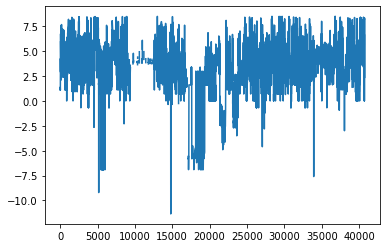

In [ ]:
np.log(df_unique[df_unique['Zn'] < 5000]['Zn']).plot()

In [ ]:
df_unique.loc[:, df_minerals.columns] = df_unique.loc[:, df_minerals.columns].apply(np.log,axis=1)

NameError: name 'df_minerals' is not defined

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
X = df_unique.drop(['Zn', 'wamex_lat', 'wamex_lon'], axis =1)
y = df_unique['Zn']

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

print("train MSE: ", mean_squared_error(train_pred, y_train))
print("test MSE: ", mean_absolute_error(test_pred, y_test))

train MSE:  114802781.99947995
test MSE:  1024.3170999645158
